## Principles and Applications of Data Science (Spring 2020)
## Homework 3
## Due: June 24, 2020

### Name: 沈煥騰
### Student ID Number: 108598009

### Homework Description
This assignment is to practice how to generate a linear regression from a numeric dataset.We provide the weather data ﬁle (`Weather_2009_2016.csv`) for practice. In the dataset, there are twelve attributes; however, we only interest the eleven attributes for exploring the linear regression. These attributes are 
<font color=green>
1. Temperature (degC) 
2. Pressure (mbar)     
3. Tdew (degC)        
4. rh (%)             
5. VPdef (mbar)       
6. sh (g/kg)          
7. H2OC (mmol/mol)    
8. rho (g/m^3)       
9. wv (m/s)          
10. max. wv (m/s)      
11. wd (deg)            
</font>

The last ten columns are independent variables and the first one is the dependent variable. Assume the linear regression can be denoted as
$$ \textbf{y}  =  c + a_1 \textbf{x}_1  + \dots + a_{10} \textbf{x}_{10} $$
$y$ is the dependent variable, $x_i$'s are independent variables, $c$ is the constant and $a_i$ are the coeﬃcients of the linear regression. Please show the coeﬃcients of the linear regression in order (i.e., $c, a_1, a_2,..., a_{10}$) with the following approaches:

1. Calculate the linear regression from the raw data directly. (You can choose one of the approaches in class for implementation; of course, you must make sure that you won't get a singular matrix if you use the matrix approach.)
2. Generate a *heatmap* for the diagonal correlation matrix with attributes and show your observation.
3. Explore multiple variables with *scatter plot*. The scatter plot of Pandas is a grid of plots of multiple variables one against the other, showing the relationship of each variable to the others. Please state what you observe.
4. Improve the linear regression from question 1 and get a new linear regression if the coeﬃcients  are meaningless.


In [2]:
from itertools import islice
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv("Weather_2009_2016.csv")
print('Keys:', data.keys())
data.info()
data.head()


Keys: Index(['Date Time', 'Temperature (degC)', 'Pressure (mbar)', 'Tdew (degC)',
       'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date Time           420551 non-null  object 
 1   Temperature (degC)  420551 non-null  float64
 2   Pressure (mbar)     420551 non-null  float64
 3   Tdew (degC)         420551 non-null  float64
 4   rh (%)              420551 non-null  float64
 5   VPdef (mbar)        420551 non-null  float64
 6   sh (g/kg)           420551 non-null  float64
 7   H2OC (mmol/mol)     420551 non-null  float64
 8   rho (g/m**3)        420551 non-null  float64
 9   wv (m/s)            420551 non-null  float64
 10  max. wv (m/s)       420551 non-null  float64
 11  

,Date Time,Temperature (degC),Pressure (mbar),Tdew (degC),rh (%),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,-8.02,996.52,-8.90,93.3,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,-8.41,996.57,-9.28,93.4,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,-8.51,996.53,-9.31,93.9,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,-8.31,996.51,-9.07,94.2,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,-8.27,996.51,-9.04,94.1,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Coeff:  [ 2.52330544e-01 -2.23905769e-02 -8.25025838e-03  1.13961783e-01
 -6.80038716e+00  4.37767875e+00 -2.00653189e-01 -9.22306498e-08
  4.00953595e-07  3.34858497e-05]
Intercept:  2.872845155168539
Training set sizes:  (420551, 10)
Training Score:  0.9998952626318706


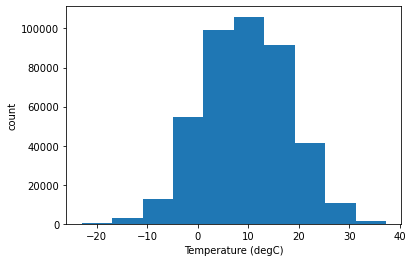

In [17]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

plt.hist(data['Temperature (degC)'])
plt.ylabel('count')
plt.xlabel('Temperature (degC)')

index = ['Pressure (mbar)', 'Tdew (degC)',
       'rh (%)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)',
       'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

x_data = data[index]
y_data = data['Temperature (degC)']

clf = linear_model.LinearRegression()
clf.fit(x_data,y_data)

print('Coeff: ',clf.coef_)
print('Intercept: ',clf.intercept_)
print('Training set sizes: ', x_data.shape)
print('Training Score: ', clf.score(x_data,y_data))

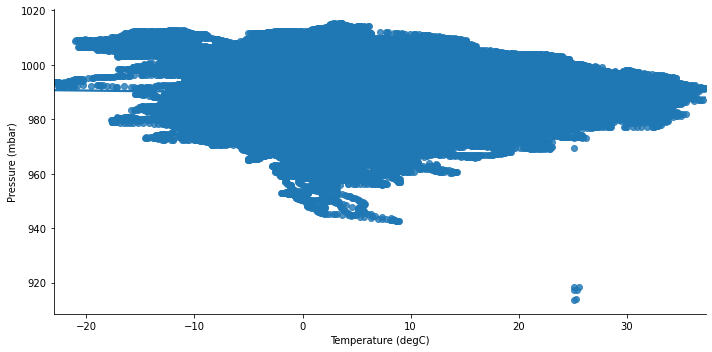

In [10]:
df = pd.DataFrame(data)

sns.lmplot("Temperature (degC)", "Pressure (mbar)", df, height=5, aspect = 2);

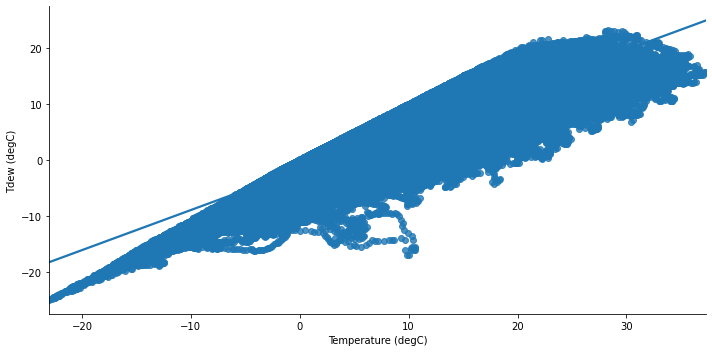

In [6]:
sns.lmplot("Temperature (degC)", "Tdew (degC)", df, height=5, aspect = 2);

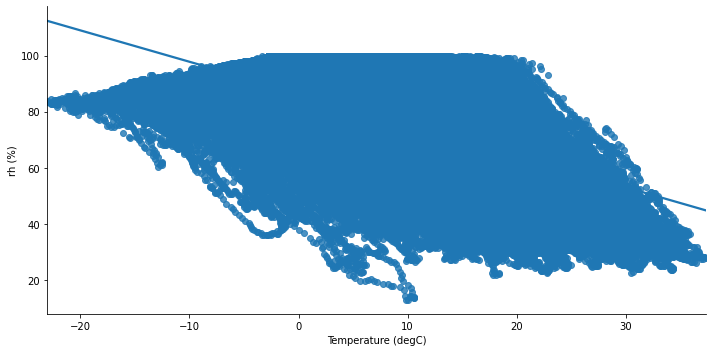

In [7]:
sns.lmplot("Temperature (degC)", "rh (%)", df, height=5, aspect = 2);

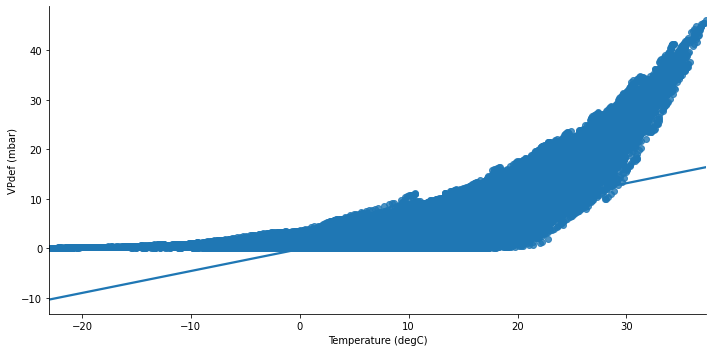

In [8]:
sns.lmplot("Temperature (degC)", "VPdef (mbar)", df, height=5, aspect = 2);

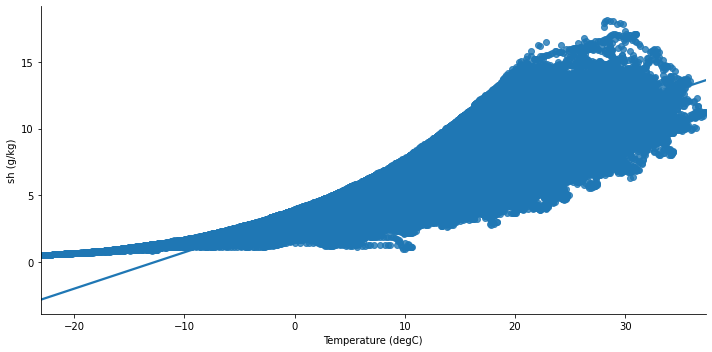

In [9]:
sns.lmplot("Temperature (degC)", "sh (g/kg)", df, height=5, aspect = 2);

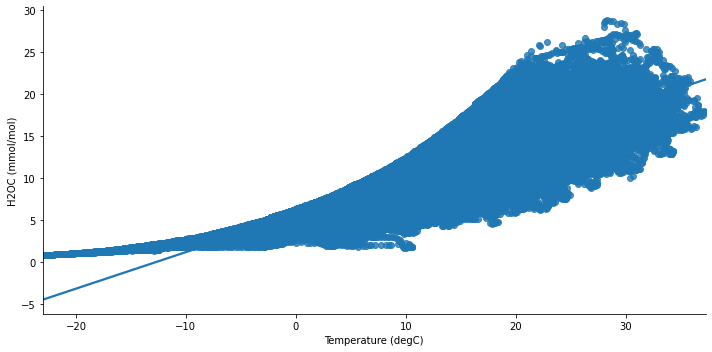

In [10]:
sns.lmplot("Temperature (degC)", "H2OC (mmol/mol)", df, height=5, aspect = 2);

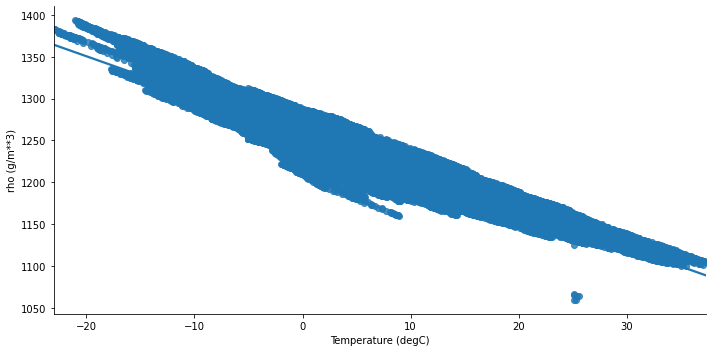

In [11]:
sns.lmplot("Temperature (degC)", "rho (g/m**3)", df, height=5, aspect = 2);

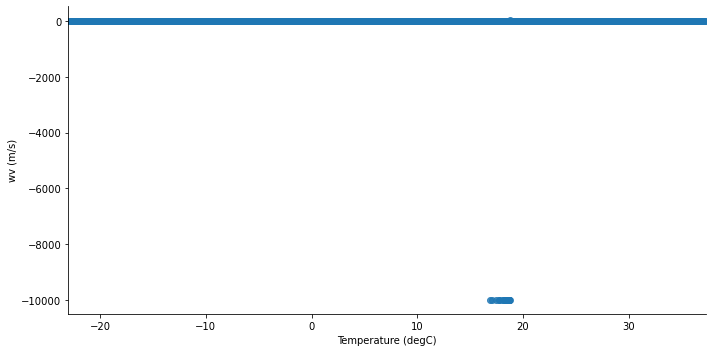

In [12]:
sns.lmplot("Temperature (degC)", "wv (m/s)", df, height=5, aspect = 2);

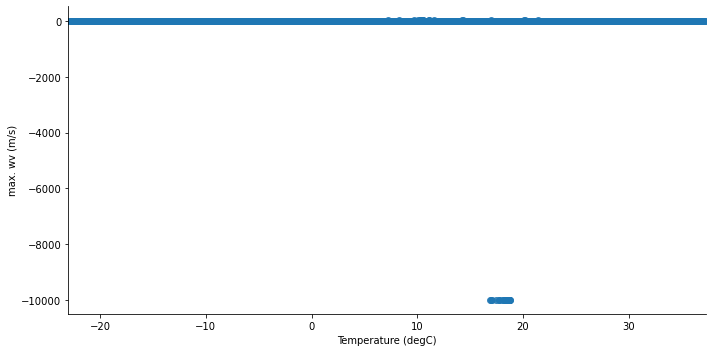

In [13]:
sns.lmplot("Temperature (degC)", "max. wv (m/s)", df, height=5, aspect = 2);

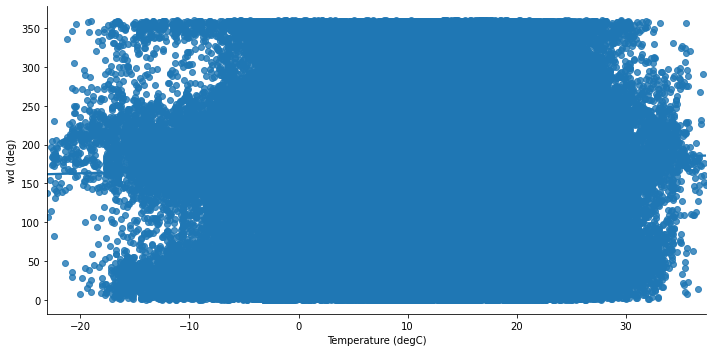

In [14]:
sns.lmplot("Temperature (degC)", "wd (deg)", df, height=5, aspect = 2);

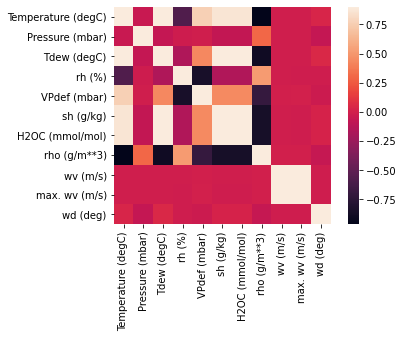

In [11]:
#headmap
corrmat = df.corr()

sns.heatmap(corrmat, vmax = .9, square = True)

# Temperature,Tdew,sh,H2OC與rho的相關係數接近-1，VPdef與rh也是
# 其他的則是0.5左右

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1BE64910>,
      dtype=object)

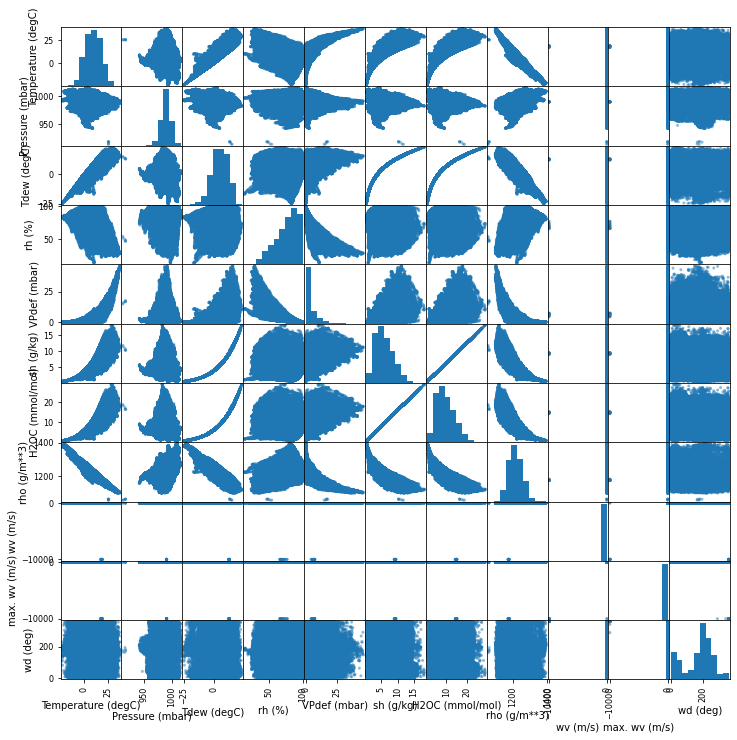

In [3]:
pd.plotting.scatter_matrix(data, figsize=(12.0, 12.0))

# rho與Temperature呈現負相關，Tdew與H2OC、Tdew與sh也是
# H2OC與sh呈正比

In [18]:
# Improve the linear regression
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(x_data)
scalerY = StandardScaler().fit(y_data.values.reshape(-1,1))

x_train = scalerX.transform(x_data)
y_train = scalerY.transform(y_data.values.reshape(-1,1))

imp_clf = linear_model.LinearRegression()
imp_clf.fit(x_train,y_train)

print('Coeff: ',imp_clf.coef_)
print('Intercept:',imp_clf.intercept_)
print('Training set sizes: ', x_train.shape)
print('Training Score: ', imp_clf.score(x_train,y_train))

Coeff:  [[ 2.50386862e-01 -1.78911488e-02 -1.61375769e-02  6.62507018e-02
  -2.14436550e+00  2.20116277e+00 -9.52250415e-01 -7.16601102e-07
   3.28521751e-06  3.44590323e-04]]
Intercept: [-1.00472429e-14]
Training set sizes:  (420551, 10)
Training Score:  0.9998952626318706
